# 1.  Train model by dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('land_transaction_data.csv')
df.rename(columns={df.columns[0]: "index"}, inplace=True)
print(df.sample(3), "\n")

     index land_txn_date           proj_name  land_txn_price openning_date  \
108    108    2013-08-01         The Terrace             355    2017-01-01   
110    110    2013-07-01       The Santorini             562    2017-01-01   
73      73    2016-01-01  Seaside Residences             858    2017-04-01   

     openning_price  
108             784  
110            1030  
73             1764   



In [2]:
# use land transaction price as feature, and property openning price as label

x = df[["land_txn_price"]]
y = df["openning_price"]

In [3]:
x.shape

(120, 1)

In [4]:
#check all data is reasonable

print(x.max())
print(x.min())
print(y.max())
print(y.min())

land_txn_price    2377
dtype: int64
land_txn_price    278
dtype: int64
3626
742


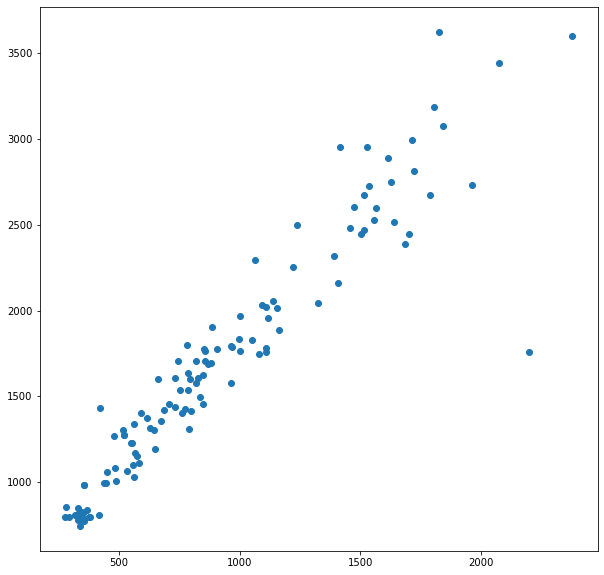

In [5]:
# find the relationship between feature and label

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y)

In [6]:
# only 120 data to train the model, data size is not big enough, only use 10% for testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 42)  

In [7]:
# there is obvious linear relationship between x and y, so use linear regression to train the model

linReg = LinearRegression()
linReg_model = linReg.fit(x_train, y_train)

In [8]:
# view the r2 score (coefficient of determination), 0.88 means the model is reliable

y_train_pred = linReg.predict(x_train)
print(r2_score(y_train, y_train_pred))

0.8847207971091474


In [9]:
# test the model by test dataset, r2 score reaches to 0.93

y_test_pred = linReg.predict(x_test)
print(r2_score(y_test, y_test_pred))

0.9313167868980607


In [10]:
print(linReg.intercept_)
print(linReg.coef_)

459.5043965429136
[1.34358634]


# 2.  Predict data by model

In [72]:
df_new = pd.read_csv('new_proj_land_txn_data.csv')
print(df_new.sample(3), "\n")

  land_txn_date           proj_name  land_txn_price
2    2021-12-01     Former La Ville            1540
1    2021-12-01   Former High Point            2626
4    2021-10-01  Slim Barracks Rise            1210 



In [73]:
# add prediction data to new column
df_new["predict_price"] = 0
 
df_new_land_price = df_new["land_txn_price"]

for i in range(df_new_land_price.size):
    df_predict_price = linReg_model.predict([[df_new_land_price.iloc[i]]])
    df_new.iloc[i, 3] = int(df_predict_price)
    
# save prediction data into
df_new.to_csv('new_proj_land_txn_data.csv', index=False)

In [81]:
df_temp

,land_txn_date,proj_name,land_txn_price,predict_price,index
0,2022-01-01,Gloria Mansions,1098,1939,3
1,2021-12-01,Former High Point,2626,3995,3
2,2021-12-01,Former La Ville,1540,2534,3
3,2021-10-01,Watten Estate Condominium,1723,2780,3
4,2021-10-01,Slim Barracks Rise,1210,2090,3
5,2021-10-01,Slim Barracks Rise,1246,2139,3
6,2021-09-01,Flynn Park,1318,2235,3
7,2021-08-01,Tampines Street 62,659,1349,3
8,2021-06-01,Tengah Garden Walk,603,1273,3
9,2021-06-01,Ang Mo Kio Avenue 1,1118,1966,3


In [93]:
df_temp = pd.read_csv('new_proj_land_txn_data.csv')
df_temp["index"] = 0
count = df_temp.shape[0]
for i in range(count):
    df_temp.iloc[i, 4] = count - i

df_temp.to_csv('new_proj_land_txn_data.csv', index=False)

# 3. Update newly launched project data to Redis

In [53]:
import redis
import csv
import json

In [56]:
# set redis connection parameter

r = redis.Redis(host = "20.124.252.164", port = 7000, password = "team_seven", decode_responses = True)

In [49]:
import csv
import json

# reverse index


In [94]:
with open("new_proj_land_txn_data.csv", encoding="gbk") as f:
    reader = csv.DictReader(f)
    for row in reader:
        a = json.dumps(row)
        print(a)

{"land_txn_date": "2022-01-01", "proj_name": "Gloria Mansions", "land_txn_price": "1098", "predict_price": "1939", "index": "14"}
{"land_txn_date": "2021-12-01", "proj_name": "Former High Point", "land_txn_price": "2626", "predict_price": "3995", "index": "13"}
{"land_txn_date": "2021-12-01", "proj_name": "Former La Ville", "land_txn_price": "1540", "predict_price": "2534", "index": "12"}
{"land_txn_date": "2021-10-01", "proj_name": "Watten Estate Condominium", "land_txn_price": "1723", "predict_price": "2780", "index": "11"}
{"land_txn_date": "2021-10-01", "proj_name": "Slim Barracks Rise", "land_txn_price": "1210", "predict_price": "2090", "index": "10"}
{"land_txn_date": "2021-10-01", "proj_name": "Slim Barracks Rise", "land_txn_price": "1246", "predict_price": "2139", "index": "9"}
{"land_txn_date": "2021-09-01", "proj_name": "Flynn Park", "land_txn_price": "1318", "predict_price": "2235", "index": "8"}
{"land_txn_date": "2021-08-01", "proj_name": "Tampines Street 62", "land_txn_pr

In [95]:
with open("new_proj_land_txn_data.csv", encoding="gbk") as f:
    reader = csv.DictReader(f)
    for row in reader:
        index = row["index"]
        landTxnDate = row["land_txn_date"]
        projectName = row["proj_name"]
        landTxnPrice = row["land_txn_price"]
        predictPrice = row["predict_price"]

        r.hset("NewProject", index, json.dumps({
            "id": index,
            "landTxnDate": landTxnDate,
            "projectName": projectName,
            "landTxnPrice": landTxnPrice,
            "predictPrice": predictPrice
        }))